Scenario: The marketing team reports that the user engagement metrics code is showing impossible results (bounce rates over 100%, negative session times).

Problematic Code:

def analyze_user_engagement(logs_df):
    metrics = {
        'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(
            lambda x: x == 1).mean(),
        'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
        'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
    }
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',
        'duration': 'mean',
        'page_views': 'sum'
    })
    
    return metrics, device_metrics
Task:

Debug the calculations.
Add data validation.            
Implement proper time calculations.
Create summary visualizations.

Discussion Questions:

How did different prompts approach error identification?
What validation methods were suggested?
How was time handling improved?

Prompt: 

I'm working with the following bit of code. Our marketing team reports that the user engagement metrics code is showing impossible results (bounce rates over 100%, negative session times).

Problematic Code:

def analyze_user_engagement(logs_df):
    metrics = {
        'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(
            lambda x: x == 1).mean(),
        'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
        'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
    }
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',
        'duration': 'mean',
        'page_views': 'sum'
    })
    
    return metrics, device_metrics

Review this code and identify what the source of the bad data is.

#Provided response

The issue you're encountering with impossible results like bounce rates over 100% and negative session times stems from incorrect calculations in the code, particularly with how metrics like bounce rate and average session time are calculated.

Let's break it down:

1. Bounce Rate Calculation
'bounce_rate': logs_df.groupby('session_id')['page_views'].apply(lambda x: x == 1).mean(),
Issue: The code currently calculates the bounce rate by checking if page_views == 1 for each session, and then taking the mean. However, this approach could return values greater than 1 or an incorrect bounce rate, especially if there are multiple rows per session.

Explanation:

-Bounce rate should represent the percentage of sessions where users view only one page and then exit (i.e., page_views == 1).
-Incorrect calculation: The apply method is returning a series of boolean values (True or False), and then taking the mean of those booleans (interpreted as 1 or 0). This might be causing inflated or unexpected results.

Solution: You should compute the bounce rate by first identifying sessions with only one page view, and then calculating the proportion of such sessions.

2. Average Session Time Calculation
'avg_session_time': logs_df.groupby('session_id')['duration'].sum(),
Issue: The code calculates the total session duration for each session_id using sum(). This is not averaging the session time, and it's incorrect if you're looking for average session time per user.

Explanation: If duration is the time spent in individual pages or actions, summing it for a session would give the total session time. However, it should be calculated as the average duration per session to get the correct average session time.

Solution: Calculate the average duration per session instead of the sum.

3. Pages Per Session Calculation
'pages_per_session': logs_df.groupby('session_id')['page_views'].mean()
Issue: This calculation seems fine because it computes the average number of pages viewed per session. However, if the logs contain NaN values or data inconsistencies, the result might be skewed.

Solution: You might want to add some data validation to ensure no missing or erroneous page_views data.

Follow-Up Prompt:

Thanks for the explanation! Please provide the updated code per your suggestions. In addition, create a dataset with random values to test this code. The dataframe should be called logs_df and include the following fields:
session_id
page_views
duration
bounce_rate

In [3]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time.mean(),  # Use .mean() to get overall average session time
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })
    
    return metrics, device_metrics

# Test the function with the generated logs_df
metrics, device_metrics = analyze_user_engagement(logs_df)

# Print the results
print("\nEngagement Metrics:")
print(metrics)

print("\nDevice Metrics:")
print(device_metrics)



Generated DataFrame (logs_df):
  session_id  page_views  duration
0  session_1           4        57
1  session_2           5       164
2  session_3           3       230
3  session_4           5        62
4  session_5           5        77

Engagement Metrics:
{'bounce_rate': 0.18, 'avg_session_time': 332.18, 'pages_per_session': 3.07}

Device Metrics:
             session_id    duration  page_views
device_type                                    
Desktop              30  405.200000          92
Mobile               40  321.250000         127
Tablet               30  273.733333          88


Follow-Up Prompt: 

Update the number formatting for avg_session_time and duration to be HH:MM:SS

In [4]:
import pandas as pd
import numpy as np
import datetime

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Function to convert seconds into HH:MM:SS format
def seconds_to_hms(seconds):
    return str(datetime.timedelta(seconds=seconds))

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Format avg_session_time to HH:MM:SS
    avg_session_time = avg_session_time.apply(seconds_to_hms)
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time.mean(),  # Use .mean() to get overall average session time
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })

    # Format the duration column in HH:MM:SS for device_metrics as well
    device_metrics['duration'] = device_metrics['duration'].apply(seconds_to_hms)
    
    return metrics, device_metrics

# Test the function with the generated logs_df
metrics, device_metrics = analyze_user_engagement(logs_df)

# Print the results
print("\nEngagement Metrics:")
print(metrics)

print("\nDevice Metrics:")
print(device_metrics)

Generated DataFrame (logs_df):
  session_id  page_views  duration
0  session_1           4        57
1  session_2           5       164
2  session_3           3       230
3  session_4           5        62
4  session_5           5        77


TypeError: Could not convert string '0:00:570:08:110:09:400:00:340:04:070:08:520:07:070:07:020:03:560:00:440:09:430:08:100:02:440:04:300:09:530:02:050:08:340:07:160:04:200:03:200:09:300:01:050:09:140:03:500:03:090:04:320:01:550:09:460:00:570:09:450:06:090:06:000:08:550:06:170:01:020:08:220:04:200:03:390:04:140:06:540:06:460:05:120:04:480:06:280:08:050:01:170:07:200:05:470:04:140:04:230:06:430:08:210:04:220:02:220:08:460:07:510:08:520:09:530:04:570:08:590:06:550:06:560:02:220:01:500:02:220:00:310:04:090:07:160:09:550:04:140:06:540:07:120:02:390:01:220:07:250:04:360:07:480:03:520:02:080:03:330:02:320:07:100:05:230:05:090:03:470:09:000:02:530:03:500:02:330:09:360:03:360:05:550:08:130:06:180:07:120:06:150:09:000:02:560:02:570:08:38' to numeric

Follow-Up Prompt:

I'm now getting an error from "'avg_session_time': avg_session_time.mean()":
TypeError: Could not convert string

What's the best way to clean up the time formatting without getting this error?

In [5]:
# The error occurs because after converting the avg_session_time to a string format (HH:MM:SS), the calculation of .mean() becomes problematic. The mean() function expects numerical values (in seconds, for example), not string representations of time.

# Solution:
# We should first calculate the avg_session_time in seconds (as a numeric value), then convert the result to the HH:MM:SS format for display purposes only. This way, we avoid any issues with calculating the mean on string values.

# Here’s the revised approach:

# Calculate avg_session_time in seconds (as a numeric value).

# Convert the result into HH:MM:SS format after the calculations.

import pandas as pd
import numpy as np
import datetime

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Function to convert seconds into HH:MM:SS format
def seconds_to_hms(seconds):
    return str(datetime.timedelta(seconds=seconds))

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time_seconds = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Format avg_session_time to HH:MM:SS after calculating in seconds
    avg_session_time = avg_session_time_seconds.apply(seconds_to_hms)
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time.mean(),  # Use .mean() to get overall average session time
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })

    # Format the duration column in HH:MM:SS for device_metrics as well
    device_metrics['duration'] = device_metrics['duration'].apply(seconds_to_hms)
    
    return metrics, device_metrics

# Test the function with the generated logs_df
metrics, device_metrics = analyze_user_engagement(logs_df)

# Print the results
print("\nEngagement Metrics:")
print(metrics)

print("\nDevice Metrics:")
print(device_metrics)

Generated DataFrame (logs_df):
  session_id  page_views  duration
0  session_1           4        57
1  session_2           5       164
2  session_3           3       230
3  session_4           5        62
4  session_5           5        77


TypeError: Could not convert string '0:00:570:08:110:09:400:00:340:04:070:08:520:07:070:07:020:03:560:00:440:09:430:08:100:02:440:04:300:09:530:02:050:08:340:07:160:04:200:03:200:09:300:01:050:09:140:03:500:03:090:04:320:01:550:09:460:00:570:09:450:06:090:06:000:08:550:06:170:01:020:08:220:04:200:03:390:04:140:06:540:06:460:05:120:04:480:06:280:08:050:01:170:07:200:05:470:04:140:04:230:06:430:08:210:04:220:02:220:08:460:07:510:08:520:09:530:04:570:08:590:06:550:06:560:02:220:01:500:02:220:00:310:04:090:07:160:09:550:04:140:06:540:07:120:02:390:01:220:07:250:04:360:07:480:03:520:02:080:03:330:02:320:07:100:05:230:05:090:03:470:09:000:02:530:03:500:02:330:09:360:03:360:05:550:08:130:06:180:07:120:06:150:09:000:02:560:02:570:08:38' to numeric

Follow-Up Prompt:

I'm still getting the same error, so let's go back to our last working version of the code:

import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time.mean(),  # Use .mean() to get overall average session time
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })
    
    return metrics, device_metrics

# Test the function with the generated logs_df
metrics, device_metrics = analyze_user_engagement(logs_df)

# Print the results
print("\nEngagement Metrics:")
print(metrics)

print("\nDevice Metrics:")
print(device_metrics)

In the #Print the results section, reformat avg_session_time and duration to display as hour:minute:second format. Do not convert before this as it will interfere with the mean calculations.

In [6]:
import pandas as pd
import numpy as np
import datetime

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Function to convert seconds into HH:MM:SS format
def seconds_to_hms(seconds):
    return str(datetime.timedelta(seconds=seconds))

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time_seconds = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time_seconds.mean(),  # Use .mean() to get overall average session time in seconds
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })
    
    return metrics, device_metrics, avg_session_time_seconds

# Test the function with the generated logs_df
metrics, device_metrics, avg_session_time_seconds = analyze_user_engagement(logs_df)

# Format avg_session_time and duration for display
formatted_avg_session_time = seconds_to_hms(metrics['avg_session_time'])
formatted_device_metrics_duration = device_metrics['duration'].apply(seconds_to_hms)

# Print the results with formatted session times
print("\nEngagement Metrics:")
print(f"Bounce Rate: {metrics['bounce_rate'] * 100:.2f}%")
print(f"Average Session Time: {formatted_avg_session_time}")
print(f"Pages per Session: {metrics['pages_per_session']}")

print("\nDevice Metrics:")
device_metrics['duration'] = formatted_device_metrics_duration
print(device_metrics)

Generated DataFrame (logs_df):
  session_id  page_views  duration
0  session_1           4        57
1  session_2           5       164
2  session_3           3       230
3  session_4           5        62
4  session_5           5        77

Engagement Metrics:
Bounce Rate: 18.00%
Average Session Time: 0:05:32.180000
Pages per Session: 3.07

Device Metrics:
             session_id        duration  page_views
device_type                                        
Desktop              30  0:06:45.200000          92
Mobile               40  0:05:21.250000         127
Tablet               30  0:04:33.733333          88


Follow-Up Prompt:
Great, last edit: round seconds to a whole integer in the same part of the code where the format conversion was made. 

In [7]:
import pandas as pd
import numpy as np
import datetime

# Set a seed for reproducibility
np.random.seed(42)

# Number of rows
num_rows = 100

# Generate session IDs (simple string pattern)
session_ids = [f'session_{i+1}' for i in range(num_rows)]

# Generate random page_views (values between 1 and 5)
page_views = np.random.randint(1, 6, size=num_rows)

# Generate random session duration (values between 30 and 600 seconds)
duration = np.random.randint(30, 601, size=num_rows)

# Create the DataFrame
logs_df = pd.DataFrame({
    'session_id': session_ids,
    'page_views': page_views,
    'duration': duration
})

# Display the first few rows of the generated DataFrame
print("Generated DataFrame (logs_df):")
print(logs_df.head())

# Function to convert seconds into HH:MM:SS format
def seconds_to_hms(seconds):
    return str(datetime.timedelta(seconds=seconds))

# Now define the revised user engagement analysis function
def analyze_user_engagement(logs_df):
    # Corrected bounce rate calculation
    bounce_rate = logs_df.groupby('session_id')['page_views'].apply(lambda x: (x == 1).sum() / len(x)).mean()
    
    # Corrected avg_session_time calculation (average duration per session)
    avg_session_time_seconds = logs_df.groupby('session_id')['duration'].sum() / logs_df.groupby('session_id')['session_id'].count()
    
    # Corrected pages_per_session calculation
    pages_per_session = logs_df.groupby('session_id')['page_views'].mean()
    
    metrics = {
        'bounce_rate': bounce_rate,
        'avg_session_time': avg_session_time_seconds.mean(),  # Use .mean() to get overall average session time in seconds
        'pages_per_session': pages_per_session.mean()  # Use .mean() to get overall average pages per session
    }
    
    # Device-level metrics (assuming 'device_type' is part of the DataFrame)
    # For this example, we'll generate random 'device_type' as well
    logs_df['device_type'] = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=num_rows)
    
    device_metrics = logs_df.groupby('device_type').agg({
        'session_id': 'count',  # Count number of sessions per device type
        'duration': 'mean',     # Mean session duration per device type
        'page_views': 'sum'     # Total page views per device type
    })
    
    return metrics, device_metrics, avg_session_time_seconds

# Test the function with the generated logs_df
metrics, device_metrics, avg_session_time_seconds = analyze_user_engagement(logs_df)

# Round and format avg_session_time and duration for display
rounded_avg_session_time = round(metrics['avg_session_time'])
formatted_avg_session_time = seconds_to_hms(rounded_avg_session_time)

# Round and format the device metrics 'duration' for display
rounded_device_metrics_duration = device_metrics['duration'].apply(lambda x: round(x))
formatted_device_metrics_duration = rounded_device_metrics_duration.apply(seconds_to_hms)

# Print the results with formatted session times
print("\nEngagement Metrics:")
print(f"Bounce Rate: {metrics['bounce_rate'] * 100:.2f}%")
print(f"Average Session Time: {formatted_avg_session_time}")
print(f"Pages per Session: {metrics['pages_per_session']}")

print("\nDevice Metrics:")
device_metrics['duration'] = formatted_device_metrics_duration
print(device_metrics)

Generated DataFrame (logs_df):
  session_id  page_views  duration
0  session_1           4        57
1  session_2           5       164
2  session_3           3       230
3  session_4           5        62
4  session_5           5        77

Engagement Metrics:
Bounce Rate: 18.00%
Average Session Time: 0:05:32
Pages per Session: 3.07

Device Metrics:
             session_id duration  page_views
device_type                                 
Desktop              30  0:06:45          92
Mobile               40  0:05:21         127
Tablet               30  0:04:34          88


Prompt: 

Fantastic. Let's make some visualizations for this data. As an expert Data Analyst, what types of chart(s) would you recommend?

Generated response:

As an expert Data Analyst, I would recommend a few different types of charts to help visualize and communicate the insights from your user engagement data. Given the metrics we are working with, here are the best visualization options:

1. Bounce Rate Distribution
Type: Bar Chart

Why: A bar chart is ideal to visualize the bounce rate across different sessions or device types. Since bounce rate is a percentage (between 0-100%), a bar chart will show how sessions are performing in terms of the percentage of users who bounced.

Possible Comparison: Bounce rate by device type or by page views.

2. Average Session Time
Type: Box Plot

Why: A box plot can help show the distribution of session durations across sessions and highlight the median, quartiles, and outliers. This would give us insights into how long users stay on average and whether there are extreme outliers.

Possible Comparison: Average session time across different device types.

3. Pages per Session
Type: Histogram

Why: A histogram can show the distribution of the number of page views per session. This will give us insight into the spread of how many pages users view per session and whether there are any concentrations around certain values.

Possible Comparison: Pages per session across different device types.

4. Session Duration by Device Type
Type: Bar Chart or Box Plot

Why: A bar chart or box plot would help visualize how the session duration varies across different device types. This comparison will help identify if users on mobile, desktop, or tablet spend more time on the site.

Possible Comparison: Average duration of sessions on mobile, desktop, and tablet.

5. Correlation between Session Duration and Pages per Session
Type: Scatter Plot

Why: A scatter plot can help visualize whether there is any correlation between session duration and the number of pages per session. This is useful to see if longer sessions tend to have more pages viewed.

Possible Comparison: You could also color-code the scatter plot by device type to see if different devices influence this relationship.

6. Overall Engagement Summary
Type: Pie Chart

Why: A pie chart could provide a quick visual of overall session counts or percentage breakdowns, for example, session counts by device type or bounce rate categories (e.g., high bounce vs low bounce).


In [8]:
#Generated code

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 1. Bounce Rate by Device Type (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x='device_type', y='bounce_rate', data=logs_df, palette='Blues_d')
plt.title('Bounce Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Bounce Rate')
plt.show()

# 2. Session Duration Distribution (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='device_type', y='duration', data=logs_df, palette='Set2')
plt.title('Session Duration by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Session Duration (Seconds)')
plt.show()

# 3. Pages per Session (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(logs_df['page_views'], kde=True, color='purple', bins=10)
plt.title('Distribution of Pages per Session')
plt.xlabel('Pages per Session')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot of Session Duration vs Pages per Session (Colored by Device Type)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='page_views', hue='device_type', data=logs_df, palette='Set1')
plt.title('Session Duration vs Pages per Session')
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Pages per Session')
plt.show()

ValueError: Could not interpret value `bounce_rate` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

Follow-Up Prompt:

I'm getting an error when running the code. This line is from the first bar chart: sns.barplot(x='device_type', y='bounce_rate', data=logs_df, palette='Blues_d')

Here's the error: Could not interpret value `bounce_rate` for `y`. An entry with this name does not appear in `data`.

This is coming from 'bounce_rate' not being in the log_df dataframe.

/var/folders/6j/5730h4y12159227rqs8wg2r80000gn/T/ipykernel_73253/301816222.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device_type', y='bounce_rate', data=logs_df, palette='Blues_d')


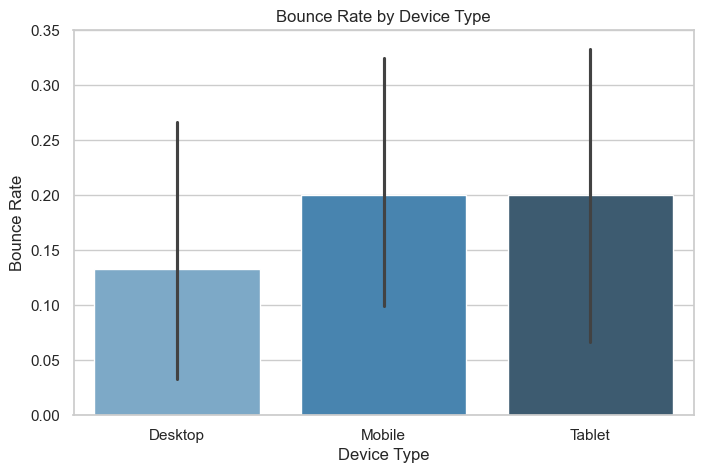

In [9]:
# The error likely occurs because bounce_rate is not a column in the logs_df DataFrame itself, but rather a derived metric calculated in the analyze_user_engagement function. Since you haven't added the bounce_rate column to logs_df, it's not available for plotting.

# Solution:
# Add bounce_rate to logs_df and Plot
# First, calculate the bounce_rate for each session, then use it for plotting. The bounce rate per session is the proportion of sessions with only 1 page view.

# Updated Code:

# First, calculate the bounce rate per session
logs_df['bounce_rate'] = logs_df.groupby('session_id')['page_views'].transform(lambda x: (x == 1).sum() / len(x))

# Plotting Bounce Rate by Device Type (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x='device_type', y='bounce_rate', data=logs_df, palette='Blues_d')
plt.title('Bounce Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Bounce Rate')
plt.show()

Follow-Up Prompt:

This works! Though I'm now getting this error: FutureWarning: 

Passing palette without assigning hue is deprecated and will be removed in v0.14.0. Assign the x variable to hue and set legend=False for the same effect.

  sns.barplot(x='device_type', y='bounce_rate', data=logs_df, palette='Blues_d')

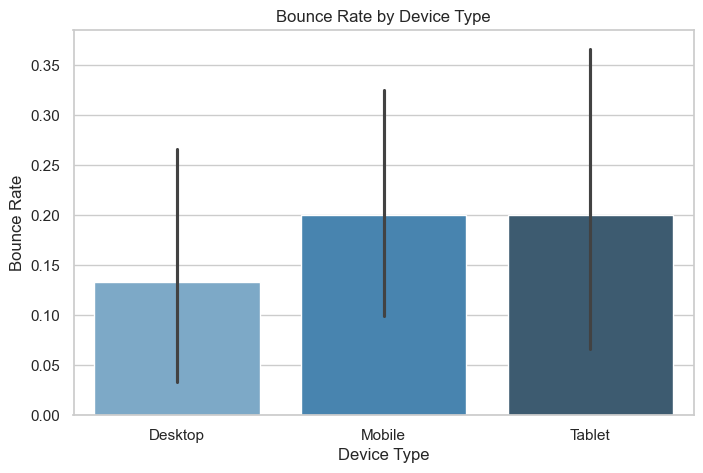

In [15]:
# Plotting Bounce Rate by Device Type (Bar Chart)
plt.figure(figsize=(8, 5))
sns.barplot(x='device_type', y='bounce_rate', data=logs_df, hue='device_type', palette='Blues_d', legend=False)
plt.title('Bounce Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Bounce Rate')
plt.show()

/var/folders/6j/5730h4y12159227rqs8wg2r80000gn/T/ipykernel_73253/2555873132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='device_type', y='duration', data=logs_df, palette='Set2')


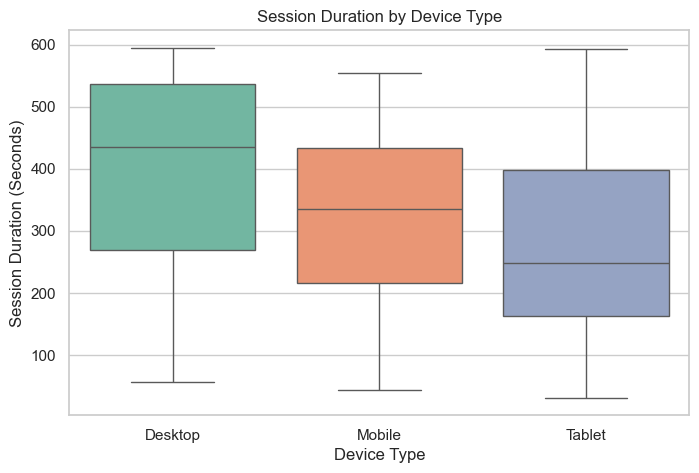

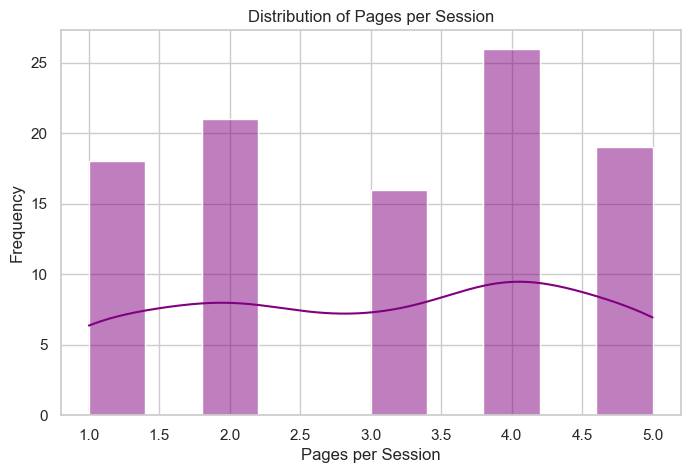

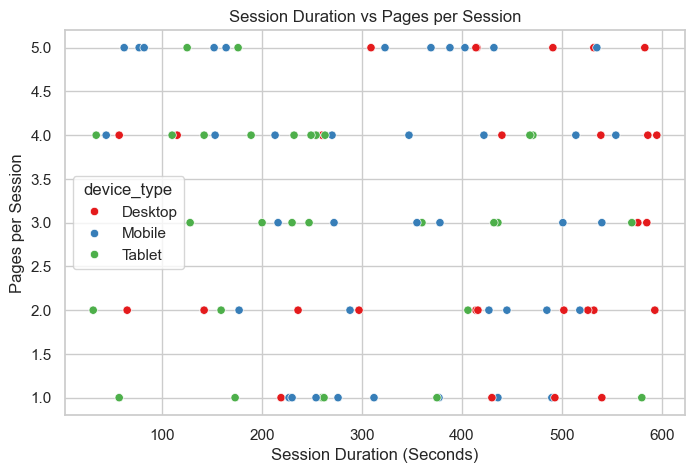

In [11]:
#Running the rest of the previously provided code now that the first has been fixed

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 2. Session Duration Distribution (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='device_type', y='duration', data=logs_df, palette='Set2')
plt.title('Session Duration by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Session Duration (Seconds)')
plt.show()

# 3. Pages per Session (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(logs_df['page_views'], kde=True, color='purple', bins=10)
plt.title('Distribution of Pages per Session')
plt.xlabel('Pages per Session')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot of Session Duration vs Pages per Session (Colored by Device Type)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='page_views', hue='device_type', data=logs_df, palette='Set1')
plt.title('Session Duration vs Pages per Session')
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Pages per Session')
plt.show()

Follow-Up Prompt:

That works! Update the code from the other three graphs to avoid this same error


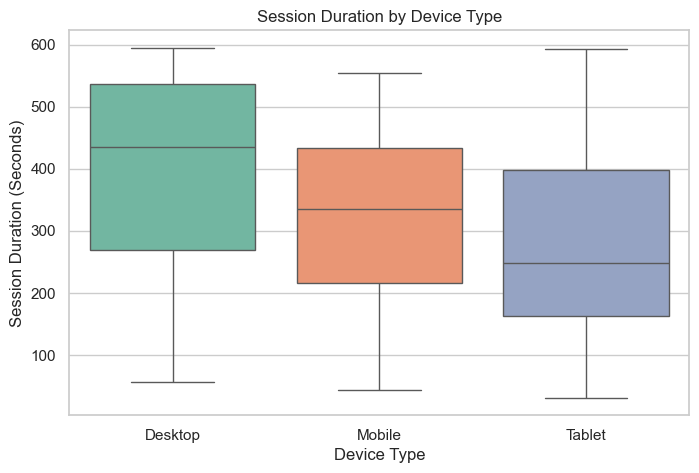

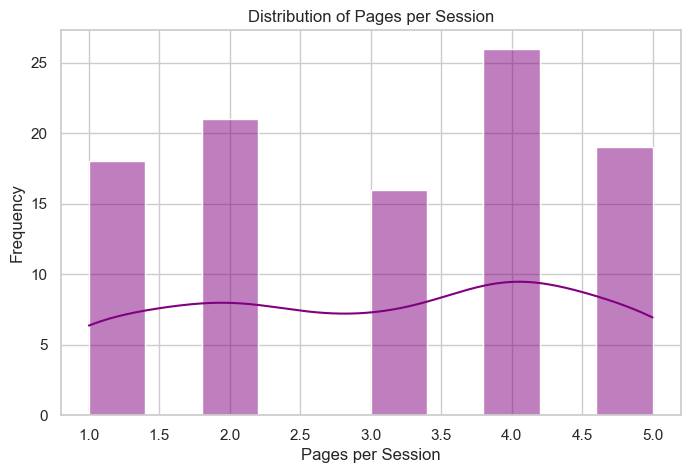

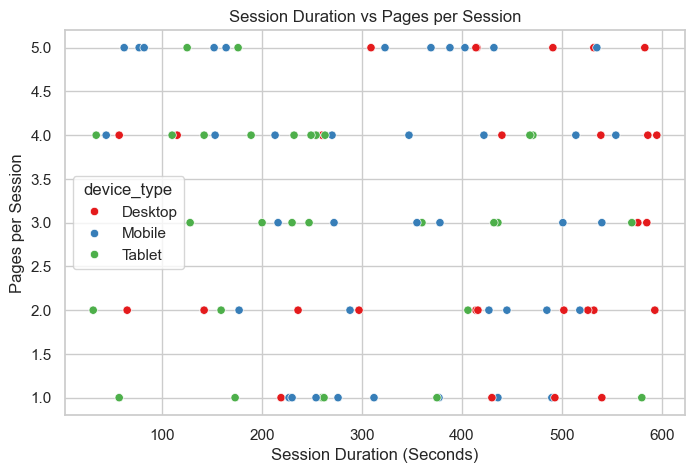

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 2. Session Duration Distribution (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='device_type', y='duration', data=logs_df, hue='device_type', palette='Set2', legend=False)
plt.title('Session Duration by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Session Duration (Seconds)')
plt.show()

# 3. Pages per Session (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(logs_df['page_views'], kde=True, color='purple', bins=10)
plt.title('Distribution of Pages per Session')
plt.xlabel('Pages per Session')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot of Session Duration vs Pages per Session (Colored by Device Type)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='duration', y='page_views', hue='device_type', data=logs_df, palette='Set1', legend=True)
plt.title('Session Duration vs Pages per Session')
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Pages per Session')
plt.show()

Discussion Questions:

1. How did different prompts approach error identification?
Sorting out the time formatting for duration and avg_session_time was quite a headache. I realized that I had to be specific about where the transformation should happen so it doesn't impact the calculation. GPT even explained in one of the responses why the error was happening and the revised code still didn't fix it. I definitely see the value in being able to read and comprehend the code on my own rather than relying on AI here. 

2. What validation methods were suggested?
I didn't actually ask for validation method suggestions...perhaps it's too late to fix that now, but I asked GPT to create a dataframe with random values based on the variables provided in the initial code. I did ask for suggestions on which graphs to use, which I found really helpful. In particular, I like the boxplot for session duration by device. In my previous role, we worked with Google Analytics to understand site interactions on Giving Days. There's a huge push for mobile giving right now, and while this is random data, it aligns with trends we often saw that desktop users spent the most time on the site, followed by mobile, then tablet. 

3. How was time handling improved?
I answered this above, but when creating the dataframe, the time values were stored only in seconds. This meant lots of triple-digit values that required the reader to do the mental conversion for. Changing the format seemed easy at first, but quickly became complicated with trying to generate a mean for either value. My BFF ChatGPT and I then fixed the code to only do time conversions at the end when printing the results. This would also leave the option open for any other analysis of those fields without getting an error. 